In [95]:
import matplotlib.pyplot as plt
import pandas as pd
import os
import pandas as pd
import numpy as np
from IPython.display import clear_output
from matplotlib import pyplot as plt
from scipy import stats

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D
%matplotlib inline

# Comparision between same activities different people

In [96]:
xmin = 0
xmax = 0
ymin = 0
ymax = 0
zmin = 0
zmax = 0

def mins(no, lis):
    if no < min(lis):
        return no
    else :
        return min(lis)
    
def maxs(no, lis):
    if no > max(lis):
        return no
    else :
        return max(lis)


In [103]:
def plot_individual_activity_kde(PATH, savePATH):
    instances = os.listdir(PATH)
  #  activities = pd.read_csv('../data_collection.csv')
    sample_size = 150
    titles = ['Walking at 3mph',
             'Jogging at 5mph',
             'Running at 7mph']
    fig = plt.figure(figsize = (15,5))
        
    for i,instance in enumerate(instances):
        df = pd.read_csv(PATH + '/' + instance)
        #df.fillna(value=0,inplace = True)
        #ax = plt.axes(projection='3d')
        
        ax = fig.add_subplot(1,3,i+1,projection = '3d')

        xdata = df['Accel_WR_X_CAL'][:sample_size]
        ydata = df['Accel_WR_Y_CAL'][:sample_size]
        zdata = df['Accel_WR_Z_CAL'][:sample_size]
        tdata = df['Timestamp_CAL'][:sample_size]
        
    
        xyz = np.vstack([xdata,ydata,zdata])
        density = stats.gaussian_kde(xyz)(xyz)
        idx = density.argsort()
        x, y, z, density = xdata[idx], ydata[idx], zdata[idx], density[idx]
                
        plt.setp(ax.get_xticklabels(), fontsize=8)
        plt.setp(ax.get_yticklabels(), fontsize=8)
        plt.setp(ax.get_zticklabels(), fontsize=8)
        
#         ax.set_xlim(-9,25)
#         ax.set_ylim(-15,22)
#         ax.set_zlim(-6,12)
        
        ax.set_xlim(-200,400)
        ax.set_ylim(-200,200)
        ax.set_zlim(-200,300)

        ax.set_xlabel('X - axis')
        ax.set_ylabel('Y - axis ')
        ax.set_zlabel('Z - axis')

     #   ax.set_title(instance[:-4] + " " + activities.Action.loc[activities.Index == int(instance[:-4])].item(), fontsize = 14)
        ax.scatter(x,y,z,c=density,cmap = density, vmin = density.min(), vmax = density.max())
        ax.set_title(titles[i], fontsize =14)

    #    plt.savefig(savePATH + instance[:-4] +'.jpg')
    plt.colorbar()
    plt.show()
    %matplotlib inline


In [104]:
def plot_individual_activity(PATH, savePATH):

    instances = os.listdir(PATH)
    #activities = pd.read_csv('../data_collection.csv')
    print()
    sample_size = 150
    
    fig = plt.figure(figsize = (15,5))
    
    titles = ['Walking at 3mph',
             'Jogging at 5mph',
             'Running at 7mph']
    for i,instance in enumerate(instances):
        
        df = pd.read_csv(PATH + '/' + instance)    
        
        xdata = df['Gyro_X_CAL'][:sample_size]
        ydata = df['Gyro_Y_CAL'][:sample_size]
        zdata = df['Gyro_Z_CAL'][:sample_size]
        tdata = df['Timestamp_CAL'][:sample_size]
        
        ax = fig.add_subplot(1,3,i+1,projection = '3d')
        
#         ax.set_xlim(-5,20)
#         ax.set_ylim(-15,22)
#         ax.set_zlim(-15,15)
        
        ax.set_xlabel('X - axis')
        ax.set_ylabel('Y - axis ')
        ax.set_zlabel('Z - axis')
        
        plt.setp(ax.get_xticklabels(), fontsize=8)
        plt.setp(ax.get_yticklabels(), fontsize=8)
        plt.setp(ax.get_zticklabels(), fontsize=8)

        #ax.set_title(instance[:-4] + " " + activities.Action.loc[activities.Index == int(instance[:-4])].item(), fontsize = 14)
        ax.set_title(titles[i], fontsize =14)
        ax.scatter3D(xdata,ydata,zdata, c ='black');
        #plt.savefig(savePATH + instance[:-4] +'.jpg')
    plt.savefig('3stages.png')
    plt.show()
    %matplotlib inline


    


folder for Devesh exists



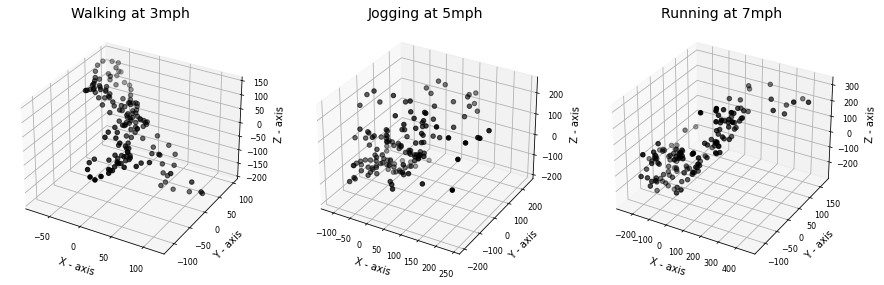

In [105]:

#  self_compare_activities_3d
dataPATH = 'Cardio_Data/Cleaned_data_p/'
for p in os.listdir(dataPATH):
    try:
        os.mkdir('../plots/self_compare_activities_3d' + '/' + p)
        print('folder for {} has been created'.format(p))
    except:
        print('folder for {} exists'.format(p))
        
    plot_individual_activity(dataPATH + '/' + p, '../plots/self_compare_activities_3d' + '/'+ p +'/')
    

In [102]:
# Plotting multiple activities in one graph
colors = ['#36803a','#0ce8f0','#9d25b0','#f21000','black','orange','violet','pink','brown']
count = 0
data_prep =pd.DataFrame(columns = ['Accel_WR_X_CAL','Accel_WR_Y_CAL','Accel_WR_Z_CAL','Timestamp_CAL','activity', 'color'])

PATH = '/home/drdev/Documents/face_touch_limit/' +  'Devesh/'
instances = os.listdir(PATH)
for instance in instances:
    #read each file
    df = pd.read_csv( PATH + instance)#[:400]   
    # filter needed columns
    df = df[['Accel_WR_X_CAL','Accel_WR_Y_CAL','Accel_WR_Z_CAL','Timestamp_CAL']]#.sample(600)
    #add activity columnn
    df['activity'] = instance[:-4]
    df['color'] = colors[count]
    data_prep = data_prep.append(df)
    count = count+1

FileNotFoundError: [Errno 2] No such file or directory: '/home/drdev/Documents/face_touch_limit/Devesh/'

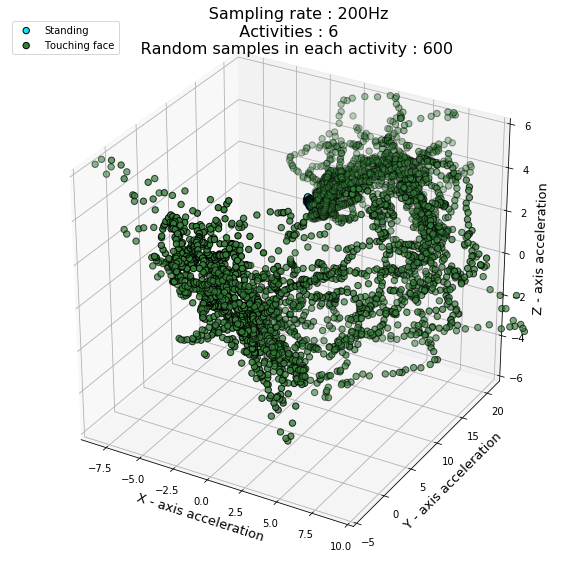

In [7]:
#group_df = data_prep.groupby(by ='activity')

fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection='3d')
group_df = data_prep.groupby(by='activity')
#plt.tight_layout()
for group in group_df.groups:
    data_prepg = group_df.get_group(group)
    xdata = data_prepg['Accel_WR_X_CAL']#[:sample_size]
    ydata = data_prepg['Accel_WR_Y_CAL']#[:sample_size]
    zdata = data_prepg['Accel_WR_Z_CAL']#[:sample_size]
    tdata = data_prepg['Timestamp_CAL']#[:sample_size]

    ax.set_xlim(-9,10)
    ax.set_ylim(-5,22)
    ax.set_zlim(-6,6)

    ax.set_xlabel('X - axis acceleration', fontsize = 13)
    ax.set_ylabel('Y - axis acceleration',fontsize = 13)
    ax.set_zlabel('Z - axis acceleration',fontsize = 13)

    #ax.set_title(" ".join(instance[:-4].split(sep ='_')).capitalize(), fontsize = 14)
    ax.scatter3D(xdata,ydata,zdata, c = list(data_prepg['color']),edgecolor='black',s=40, label=group.replace('_',' ').capitalize())
    #ax.legend()
    #plt.savefig('/home/drdev/Documents/3d_plots/' + " ".join(instance[:-4].split(sep ='_')).capitalize() +'.jpg')
plt.title('      Sampling rate : 200Hz \n  Activities : 6 \n    Random samples in each activity : 600', fontsize = 16)

plt.legend(loc='upper left')
#plt.show()
#%matplotlib inline
plt.savefig('/home/drdev/Documents/3d_plots/' + 'all_activities_600' +'.jpg')

In [8]:
data_prep['color']

0       #36803a
1       #36803a
2       #36803a
3       #36803a
4       #36803a
         ...   
4091    #0ce8f0
4092    #0ce8f0
4093    #0ce8f0
4094    #0ce8f0
4095    #0ce8f0
Name: color, Length: 8192, dtype: object

In [9]:
def f(x, y):
    return np.sin(np.sqrt(x ** 2 + y ** 2))


instances = os.listdir(clean_PATH + '/' 'Devesh')

for instance in instances:
    df = pd.read_csv(clean_PATH + '/' 'Devesh' + '/' + instance)
    fig = plt.figure(figsize = (10,10))
    ax = plt.axes(projection='3d')
    
    x  = df['Accel_WR_X_CAL'][:1000]
    y = df['Accel_WR_Y_CAL'][:1000]
    X,Y = np.meshgrid(x, y)
    Z = f(X, Y)
    zdata = df['Accel_WR_Z_CAL'][:1000]
    ax.set_title(instance[:-4])
    ax.contour3D(X,Y,Z ,1000 cmap='binary');



SyntaxError: invalid syntax (<ipython-input-9-076699c72aab>, line 18)

In [35]:
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np

from mpl_toolkits.mplot3d.axes3d import get_test_data
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import


# set up a figure twice as wide as it is tall
fig = plt.figure(figsize=plt.figaspect(0.5))

#===============
#  First subplot
#===============
# set up the axes for the first plot
ax = fig.add_subplot(1, 2, 0, projection='3d')

# plot a 3D surface like in the example mplot3d/surface3d_demo
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.set_zlim(-1.01, 1.01)
fig.colorbar(surf, shrink=0.5, aspect=10)

#===============
# Second subplot
#===============
# set up the axes for the second plot
ax = fig.add_subplot(1, 2, 2, projection='3d')

# plot a 3D wireframe like in the example mplot3d/wire3d_demo
X, Y, Z = get_test_data(0.05)
ax.plot_wireframe(X, Y, Z, rstride=10, cstride=10)

plt.show()

ValueError: num must be 1 <= num <= 2, not 0

<Figure size 576x288 with 0 Axes>